# IDX Composite

In [1]:
import pandas as pd

In [2]:
data = 'E:\Google Drive Berkeley\GitHub\idx\data\IDX-201908m.csv'

df = pd.read_csv(data)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,8/1/2019,6199.22,6399.90,6403.57,6059.87,-,-2.99%
1,7/1/2019,6390.51,6381.18,6468.25,6283.60,303.57B,0.50%
2,6/1/2019,6358.63,6277.29,6377.35,6190.52,153.94B,2.41%
3,5/1/2019,6209.12,6458.12,6465.77,5767.40,193.22B,-3.81%
4,4/1/2019,6455.35,6485.72,6636.33,6321.66,193.43B,-0.21%


### Historical IDX Composite

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
DateNum = matplotlib.dates.date2num(df['Date'])
df['DateNum'] = DateNum

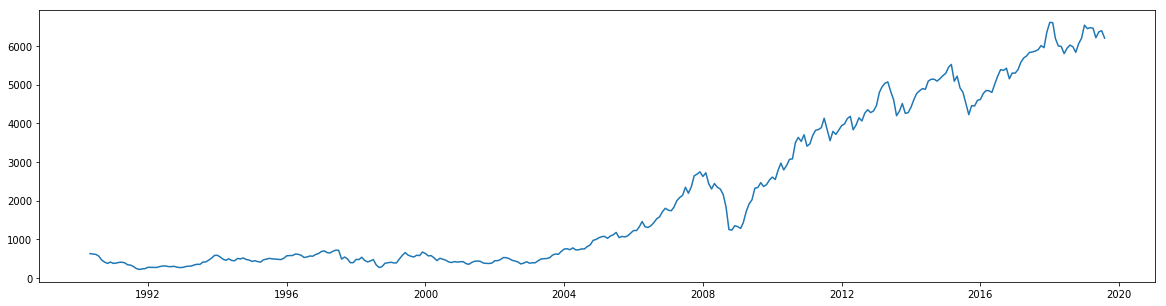

In [5]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot_date(df['DateNum'], df['Price'], linestyle = '-', marker = '')

### Historical IDX Composite Change (%)

In [6]:
df['Change %'] = df['Change %'].str.replace('%','').astype(float)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,DateNum
0,2019-08-01,6199.22,6399.90,6403.57,6059.87,-,-2.99,737272.0
1,2019-07-01,6390.51,6381.18,6468.25,6283.60,303.57B,0.50,737241.0
2,2019-06-01,6358.63,6277.29,6377.35,6190.52,153.94B,2.41,737211.0
3,2019-05-01,6209.12,6458.12,6465.77,5767.40,193.22B,-3.81,737180.0
4,2019-04-01,6455.35,6485.72,6636.33,6321.66,193.43B,-0.21,737150.0


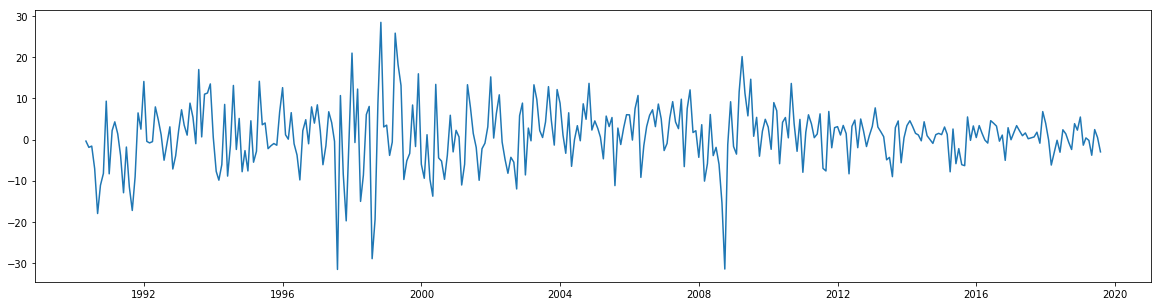

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot_date(df['DateNum'], df['Change %'], linestyle = '-', marker = '')

### IDX Composite Yearly Trendline

In [8]:
# create new columns that separate months and year
df['Month'] = df['Date'].dt.month.astype(str)
df['Year'] = df['Date'].dt.year.astype(str)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,DateNum,Month,Year
0,2019-08-01,6199.22,6399.90,6403.57,6059.87,-,-2.99,737272.0,8,2019
1,2019-07-01,6390.51,6381.18,6468.25,6283.60,303.57B,0.50,737241.0,7,2019
2,2019-06-01,6358.63,6277.29,6377.35,6190.52,153.94B,2.41,737211.0,6,2019
3,2019-05-01,6209.12,6458.12,6465.77,5767.40,193.22B,-3.81,737180.0,5,2019
4,2019-04-01,6455.35,6485.72,6636.33,6321.66,193.43B,-0.21,737150.0,4,2019


In [9]:
# split dataframe to create dataframes of each year
dfyear = dict(tuple(df.groupby('Year')))
dfyear['2018']

,Date,Price,Open,High,Low,Vol.,Change %,DateNum,Month,Year
8,2018-12-01,6194.50,6118.06,6212.12,6014.80,122.01B,2.28,737029.0,12,2018
9,2018-11-01,6056.12,5855.22,6117.19,5747.53,139.19B,3.85,736999.0,11,2018
10,2018-10-01,5831.65,5950.86,5982.06,5623.84,153.96B,-2.42,736968.0,10,2018
11,2018-09-01,5976.55,6025.41,6026.91,5621.60,121.00B,-0.70,736938.0,9,2018
12,2018-08-01,6018.46,5952.94,6117.29,5689.94,125.76B,1.38,736907.0,8,2018
13,2018-07-01,5936.44,5828.49,6027.94,5557.56,132.06B,2.37,736876.0,7,2018
14,2018-06-01,5799.24,6004.12,6116.43,5661.01,80.01B,-3.08,736846.0,6,2018
15,2018-05-01,5983.59,5999.36,6095.83,5716.65,128.85B,-0.18,736815.0,5,2018
16,2018-04-01,5994.60,6194.51,6380.35,5885.34,136.24B,-3.14,736785.0,4,2018
17,2018-03-01,6188.99,6605.31,6630.13,6085.20,166.91B,-6.19,736754.0,3,2018


In [10]:
from sklearn.preprocessing import MaxAbsScaler

def scale(year):
    """
    function to scale the price column of a year and store it in a new column named the year.
    note that input year is in string.
    """
    df = dfyear[year]
    df[year] = df[['Price']]
    df[[year]] = MaxAbsScaler().fit_transform(df[[year]])

# create list of years
yearlist = []
yearstart = 1991

while yearstart < 2020:
    yearlist.append(yearstart)
    yearstart = yearstart + 1

# perform scale function for all years in the year list    
for year in yearlist:
    scale(str(year))

In [11]:
dfyear['2018']

,Date,Price,Open,High,Low,Vol.,Change %,DateNum,Month,Year,2018
8,2018-12-01,6194.50,6118.06,6212.12,6014.80,122.01B,2.28,737029.0,12,2018,0.937761
9,2018-11-01,6056.12,5855.22,6117.19,5747.53,139.19B,3.85,736999.0,11,2018,0.916812
10,2018-10-01,5831.65,5950.86,5982.06,5623.84,153.96B,-2.42,736968.0,10,2018,0.882830
11,2018-09-01,5976.55,6025.41,6026.91,5621.60,121.00B,-0.70,736938.0,9,2018,0.904766
12,2018-08-01,6018.46,5952.94,6117.29,5689.94,125.76B,1.38,736907.0,8,2018,0.911111
13,2018-07-01,5936.44,5828.49,6027.94,5557.56,132.06B,2.37,736876.0,7,2018,0.898694
14,2018-06-01,5799.24,6004.12,6116.43,5661.01,80.01B,-3.08,736846.0,6,2018,0.877924
15,2018-05-01,5983.59,5999.36,6095.83,5716.65,128.85B,-0.18,736815.0,5,2018,0.905832
16,2018-04-01,5994.60,6194.51,6380.35,5885.34,136.24B,-3.14,736785.0,4,2018,0.907499
17,2018-03-01,6188.99,6605.31,6630.13,6085.20,166.91B,-6.19,736754.0,3,2018,0.936927


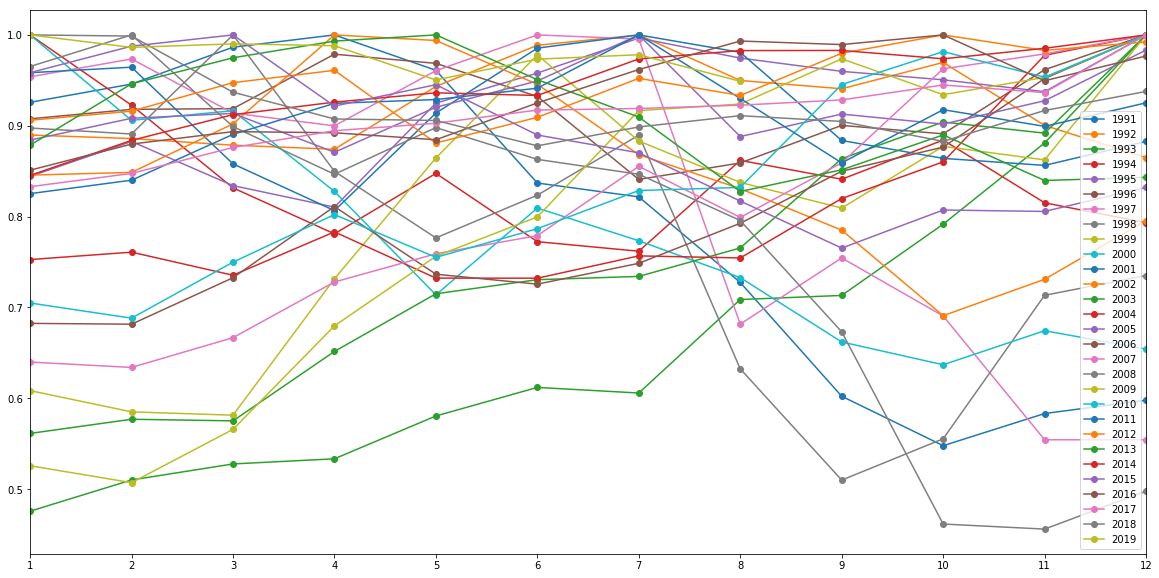

In [12]:
def plot(year):
    """
    function to plot the scaled price of a year.
    input year can be in numeric as the function will convert it to string.
    """
    df = dfyear[str(year)]
    df = df[::-1]
    x = df.Month
    y = df[year]
    plt.plot(x, y , linestyle='-', marker='o')
    plt.legend()

# create list of years to be plotted
plotyearlist = []
plotyearstart = 1991

while plotyearstart < 2020:
    plotyearlist.append(plotyearstart)
    plotyearstart = plotyearstart + 1

# plot the scaled price of all years in the list on a single graph      
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlim(0, 11)
for year in plotyearlist:
    plot(str(year))